In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from scipy import stats
from nilearn.masking import apply_mask
import seaborn as sns
sns.set_style('darkgrid')

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def round_of_rating(number, scale=1):
    return np.round(number * scale) / scale

def plot(mfx_values, test_values, ax=None, scale=1):
    #test_values = test_values[mfx_values>=0]
    #mfx_values = mfx_values[mfx_values>=0]
    diff_values =  test_values - mfx_values
    z_bins = round_of_rating(mfx_values, scale=scale)
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 10))
    else:
        fig = None
    sns.boxplot(x=z_bins, y=diff_values,
                ax=ax, color='white')
    x = np.unique(z_bins)
    y = np.array([np.mean(diff_values[z_bins==i]) for i in x]) 
    y_ci_lo = np.copy(y)
    y_ci_hi = np.copy(y)
    for i, x_val in enumerate(x):
        dat = diff_values[z_bins==x_val]
        n = len(dat)
        se = stats.sem(dat)
        h = se * stats.t.ppf(0.995, n-1)
        y_ci_lo[i], y_ci_hi[i] = y[i]-h, y[i]+h
    
    x += np.abs(np.min(x))
    x *= scale
    ax.plot(x, y)
    
    ax.fill_between(x, y_ci_lo, y_ci_hi, alpha=0.2)
    ax.set_ylim(-10, 10)
    ax.set_ylabel('Difference between estimated z-statistic\nand reference MFX GLM z-statistic', fontsize=16)
    ax.set_xlabel('Z-statistic estimated by MFX GLM', fontsize=16)
    return fig, ax

In [3]:
mask_img = nib.load('/Users/tsalo/Documents/tsalo/NiMARE/nimare/resources/templates/MNI152_2mm_mask.nii.gz')
mfx_glm = apply_mask(nib.load('results/mfx_glm_z.nii.gz'), mask_img)
rfx_glm = apply_mask(nib.load('results/rfx_glm_z.nii.gz'), mask_img)
z_mfx = apply_mask(nib.load('results/stouffers_rfx_z.nii.gz'), mask_img)
con_perm = apply_mask(nib.load('results/contrast_perm_z.nii.gz'), mask_img)
z_perm = apply_mask(nib.load('results/z_perm_z.nii.gz'), mask_img)
ffx_glm = apply_mask(nib.load('results/ffx_glm_z.nii.gz'), mask_img)
fishers = apply_mask(nib.load('results/fishers_z.nii.gz'), mask_img)
stouffers = apply_mask(nib.load('results/stouffers_ffx_z.nii.gz'), mask_img)
weighted_stouffers = apply_mask(nib.load('results/stouffers_weighted_z.nii.gz'), mask_img)
mkda_chi2_fdr = apply_mask(nib.load('results/mkda_chi2_fdr_consistency_z_FDR.nii.gz'), mask_img)
mkda_chi2_fwe = apply_mask(nib.load('results/mkda_chi2_fwe_consistency_z_FWE.nii.gz'), mask_img)
ale = apply_mask(nib.load('results/ale_z_vfwe.nii.gz'), mask_img)
scale = apply_mask(nib.load('results/scale_z.nii.gz'), mask_img)

# Cannot do MKDA density or KDA density because only thresholded maps are generated
#mkda_density = apply_mask(nib.load('results/mkda_density_vfwe.nii.gz'), mask_img)
#kda = apply_mask(nib.load('results/kda_vfwe.nii.gz'), mask_img)

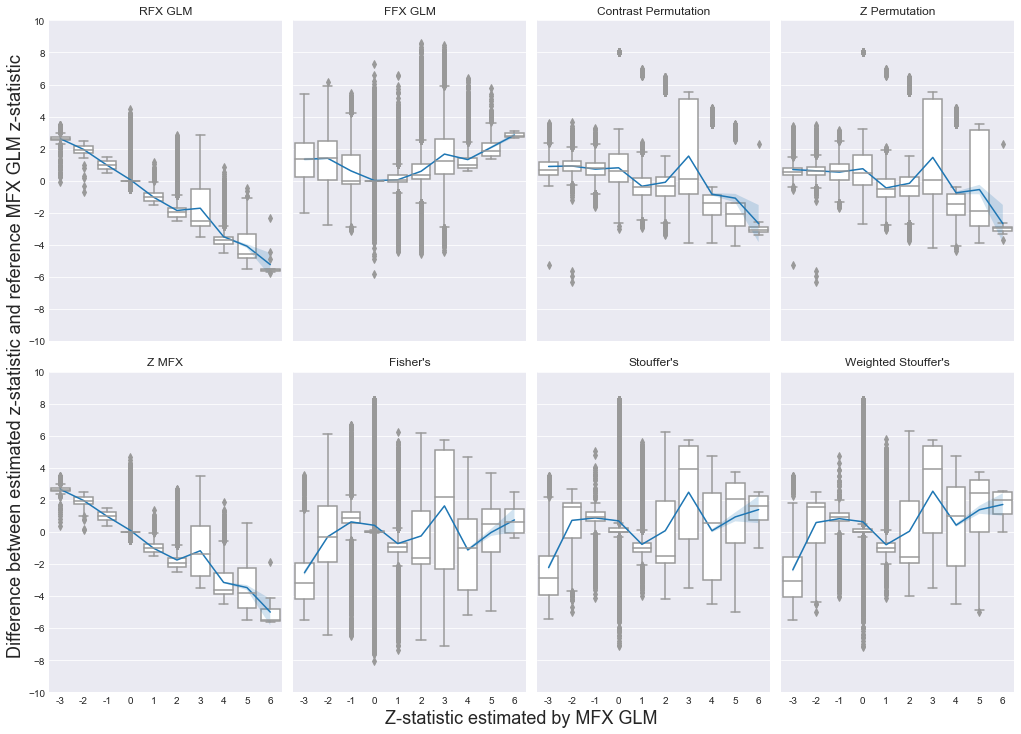

In [4]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(14, 10), sharey=True, sharex=True)

names = [['RFX GLM', 'FFX GLM', 'Contrast Permutation', 'Z Permutation'],
         ['Z MFX', "Fisher's", "Stouffer's", "Weighted Stouffer's"]]
_, axes[0, 0] = plot(mfx_glm, rfx_glm, ax=axes[0, 0])
_, axes[0, 1] = plot(mfx_glm, ffx_glm, ax=axes[0, 1])
_, axes[0, 2] = plot(mfx_glm, con_perm, ax=axes[0, 2])
_, axes[0, 3] = plot(mfx_glm, z_perm, ax=axes[0, 3])

_, axes[1, 0] = plot(mfx_glm, z_mfx, ax=axes[1, 0])
_, axes[1, 1] = plot(mfx_glm, fishers, ax=axes[1, 1])
_, axes[1, 2] = plot(mfx_glm, stouffers, ax=axes[1, 2])
_, axes[1, 3] = plot(mfx_glm, weighted_stouffers, ax=axes[1, 3])

for i in range(2):
    for j in range(4):
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')
        axes[i, j].set_title(names[i][j])
        axes[i, j].set_yticks(range(-10, 11, 2))
        
        if i == 1:
            xtls = [str(int(float(xtl.get_text()))) for xtl in axes[i, j].get_xticklabels()]
            axes[i, j].set_xticklabels(xtls)

fig.text(0.5, -0.01, 'Z-statistic estimated by MFX GLM',
         ha='center', fontsize=18)
fig.text(-0.01, 0.5, ('Difference between estimated '
                      'z-statistic and reference MFX '
                      'GLM z-statistic'),
         va='center', rotation='vertical', fontsize=18)
fig.tight_layout()
fig.savefig('figures/z_comparison.png', dpi=400, bbox_inches='tight')

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


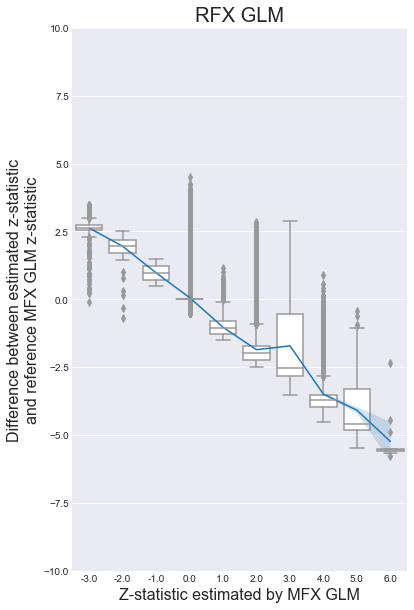

In [5]:
fig, ax = plot(mfx_glm, rfx_glm)
ax.set_title("RFX GLM", fontsize=20)
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


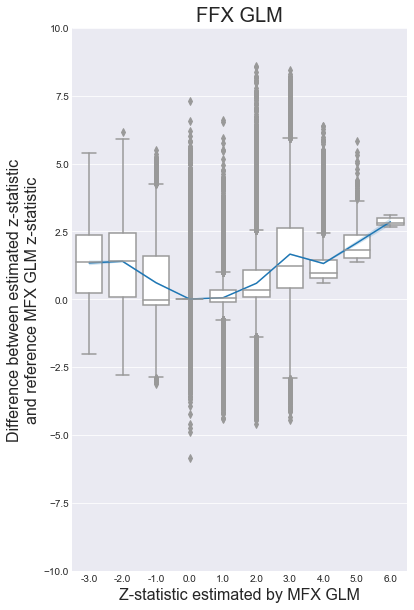

In [6]:
fig, ax = plot(mfx_glm, ffx_glm)
ax.set_title("FFX GLM", fontsize=20)
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


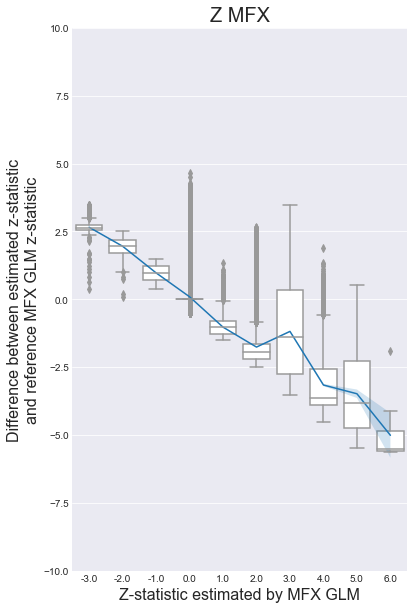

In [7]:
fig, ax = plot(mfx_glm, z_mfx)
ax.set_title("Z MFX", fontsize=20)
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


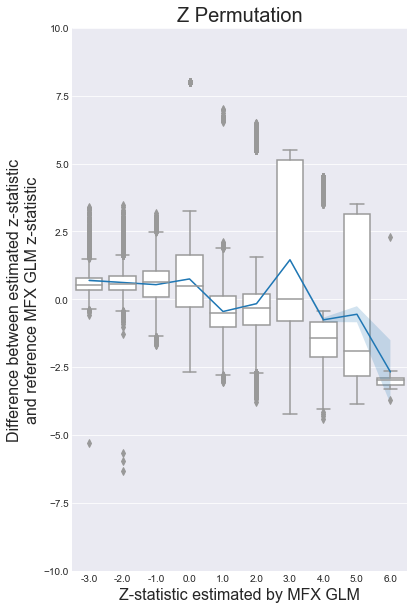

In [8]:
fig, ax = plot(mfx_glm, z_perm)
ax.set_title("Z Permutation", fontsize=20)
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


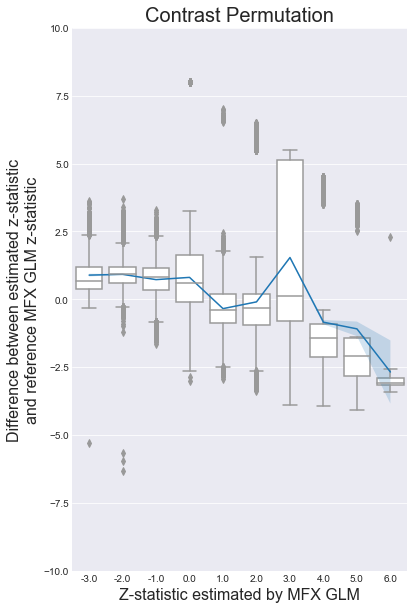

In [9]:
fig, ax = plot(mfx_glm, con_perm)
ax.set_title("Contrast Permutation", fontsize=20)
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


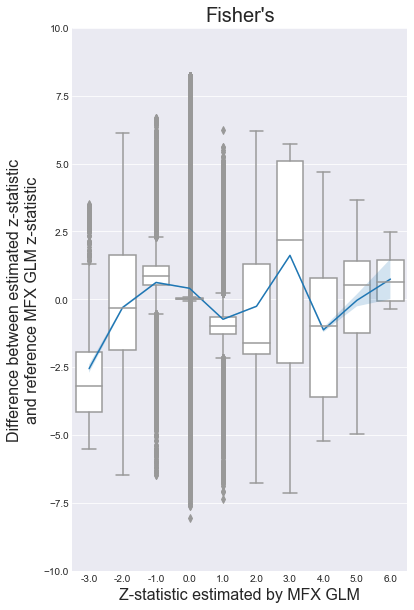

In [10]:
fig, ax = plot(mfx_glm, fishers)
ax.set_title("Fisher's", fontsize=20)
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


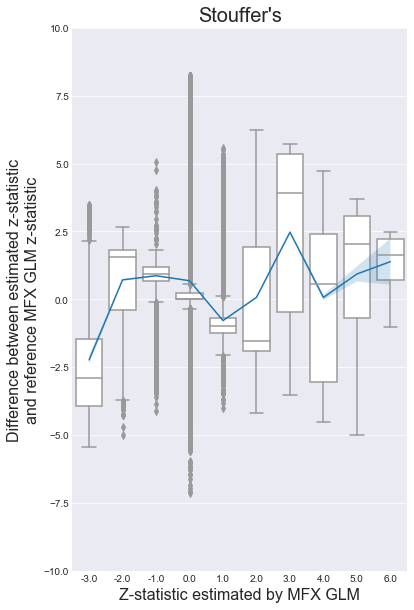

In [11]:
fig, ax = plot(mfx_glm, stouffers)
ax.set_title("Stouffer's", fontsize=20)
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


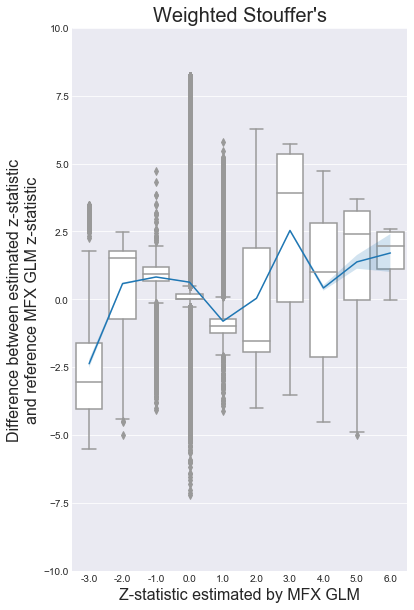

In [12]:
fig, ax = plot(mfx_glm, weighted_stouffers)
ax.set_title("Weighted Stouffer's", fontsize=20)
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


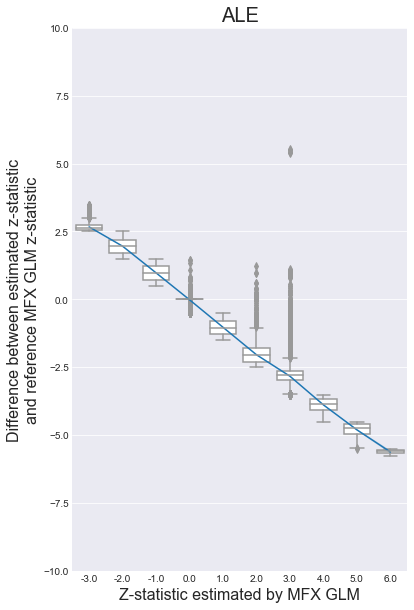

In [13]:
fig, ax = plot(mfx_glm, ale)
ax.set_title("ALE", fontsize=20)
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


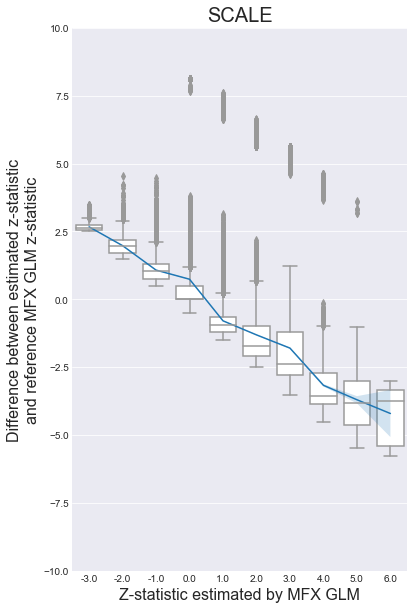

In [14]:
fig, ax = plot(mfx_glm, scale)
ax.set_title("SCALE", fontsize=20)
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


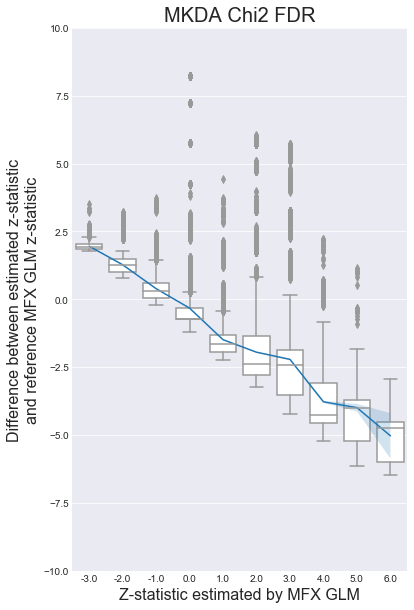

In [15]:
fig, ax = plot(mfx_glm, mkda_chi2_fdr)
ax.set_title("MKDA Chi2 FDR", fontsize=20)
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


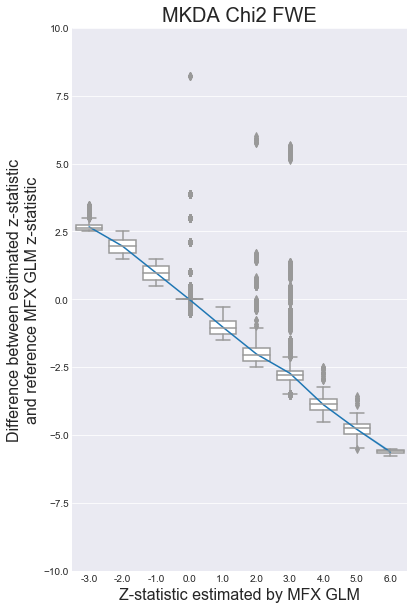

In [16]:
fig, ax = plot(mfx_glm, mkda_chi2_fwe)
ax.set_title("MKDA Chi2 FWE", fontsize=20)
fig.show()